<br/><font size="4">Kickstarter is a company that helps artists, musicians, filmmakers, designers, and other creators find the resources and support they need to make their ideas a reality. It is an enormous global community built around creativity and creative projects and over 10 million people, from every continent on earth, have backed a Kickstarter project. The company wants to find out if there is a relationship between the amount of funding requested and a project being fully funded. To figure it out, an experiment has been proposed. The company would pick projects of all categories and goal sizes and compare the totally funded projects to partially funded projects. Finally, an A/B test is conducted to compare the results. <br/>
Our <b>null hypothesis</b> would be: Funding varies by project depending on multiple factors and is not effected by the goal amount.<br/><br/>
<b><u>Hypothesis:</u></b> There is a dependency between goal amounts and funding received.

<b><u>Rollout plan:</u></b><br/>
We have chosen 347311 projects for our test with 15 different categories (Publishing, Film and Video, Music, Food, Design, Crafts, Games, Comics, Fashion, Theater, Art, Photography, Technology, Dance, Journalism) and 6 different states (failed, canceled, successful, live, undefined and suspended). Considering the nature of the website, testing continues over a period of time and results are collected for each of the project depending on the project's timeframe. A project can be of any creative category and from any country. Also, for a fully funded project, it is important to provide funding before the project’s financial deadline. Once all the information is fully collected, analysis is performed based on two tests. One is on the list of successfully funded projects and one is on partially funded projects. Each test checks for the goal amount ranges and finds out if there is any ambiguity between the lists.<br/><br/>

<b>Success metric:</b> As we are looking for more number of projects to be fully funded, the success metric would be a clear distinction between goal amounts for fully funded and partially funded projects. <br/>

<b>Secondary metric:</b> Success of the first metric extends to figuring out what project goal amount has higher chances of receive full funding.</font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [6]:
fields = ['name','category','main_category','deadline','launched','country','usd_pledged_real','usd_goal_real','state']
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\git\ThinkfulExercises\Unit 1 Drills\capstone\Kickstarter-projects\ks-projects-201801.csv",usecols=fields)
print(df.count())
df.head(5)

name                378657
category            378661
main_category       378661
deadline            378661
launched            378661
state               378661
country             378661
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64


,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,US,1283.0,19500.00


In [33]:
#Clean the data by removing null rows and unrealistic values for goal and pledged amounts 
df = df.dropna()
#print(df.isnull().sum())
df_filtered = df.drop(df[(df.usd_goal_real < 500) | (df.usd_goal_real > 250000) | (df.usd_pledged_real > 100000)].index)
print('Number of projects after filtering: {}'.format(df_filtered.name.count()))

Number of projects after filtering: 347311


In [34]:
#List of Categories and States in the dataset
df_filtered['main_category'] = df_filtered['main_category'].replace({'&': 'and'}, regex=True)
print('Categories: {}, States: {}'.format(df_filtered.main_category.unique(),df_filtered.state.unique()))

Categories: ['Publishing' 'Film and Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism'], States: ['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']


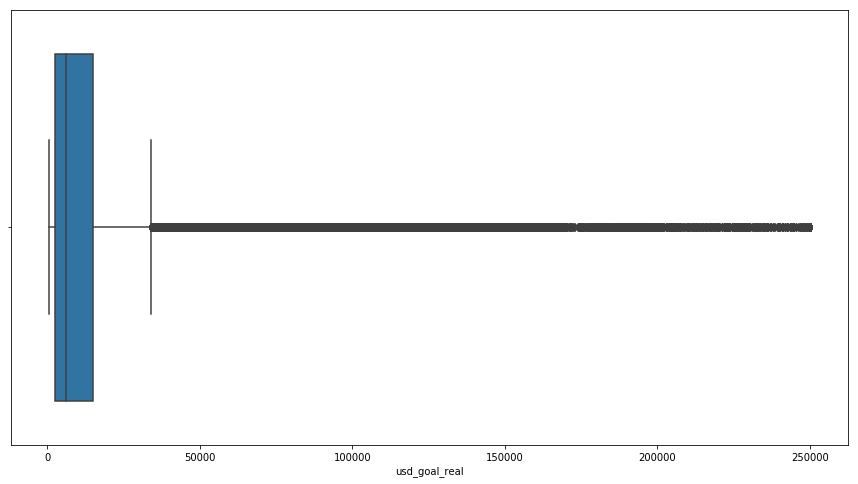

In [16]:
#Box plot for goal amount
plt.subplots(figsize=(15,8))
sns.boxplot(x=df_filtered["usd_goal_real"])

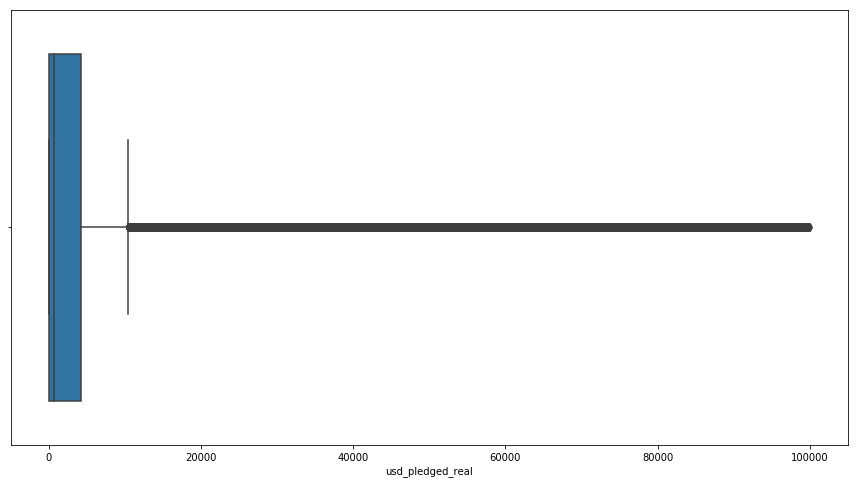

In [17]:
#Box plot for pledged amount
plt.subplots(figsize=(15,8))
sns.boxplot(x=df_filtered["usd_pledged_real"])

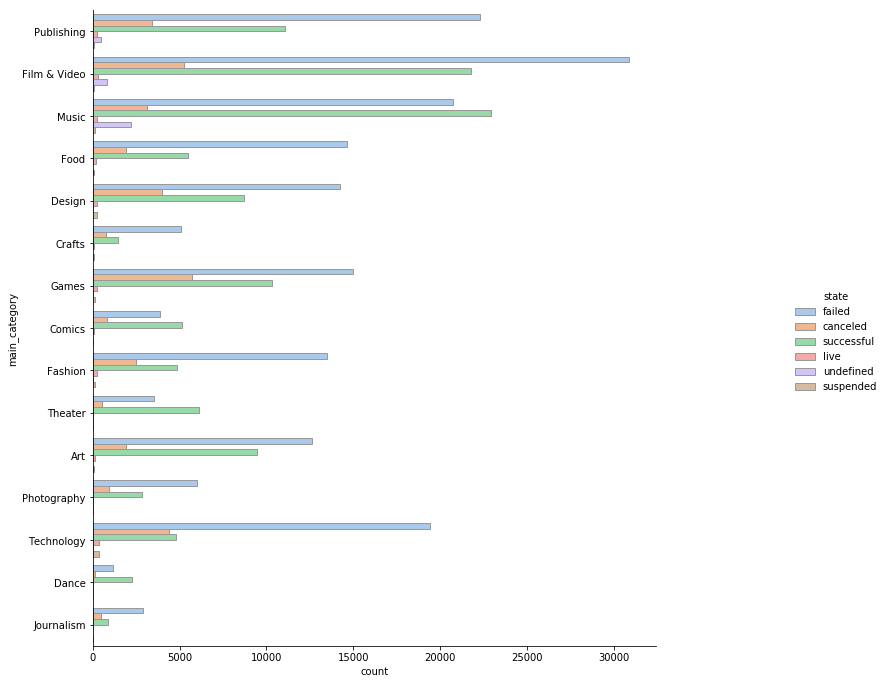

In [18]:
#Category plot for Main categories and their statuses
g = sns.catplot(y="main_category", hue="state", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtered)
g.fig.set_size_inches(15,10)

In [19]:
#Add a new column to the data frame to check of a project reached its financial goal
df_filtered['financial_goal_reached'] = np.where(df_filtered['usd_goal_real'] - df_filtered['usd_pledged_real']<0, True, False)
df_filtered.head(5)

,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real,financial_goal_reached
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,0.0,1533.95,False
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,2421.0,30000.00,False
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,US,220.0,45000.00,False
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,US,1.0,5000.00,False
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,US,1283.0,19500.00,False


In [21]:
#Calculating t and p values for goal amounts for projects that have reached their financial goals and for those that are not fully funded
print(stats.ttest_ind(df_filtered[df_filtered.financial_goal_reached].usd_goal_real, 
                df_filtered[~df_filtered.financial_goal_reached].usd_goal_real))

Ttest_indResult(statistic=-121.1718544705576, pvalue=0.0)


In [23]:
#Calculating t and p values for goal amounts per category for projects that have reached their financial goals and for those that are not fully funded
for cat in df_filtered.main_category.unique():
    print(cat)
    category_data = df_filtered[df_filtered.main_category == cat]
    print(stats.ttest_ind(category_data[category_data.financial_goal_reached].usd_goal_real,
                          category_data[~category_data.financial_goal_reached].usd_goal_real))

Publishing
Ttest_indResult(statistic=-27.537802049167688, pvalue=2.731326730606276e-165)
Film & Video
Ttest_indResult(statistic=-50.80978621326046, pvalue=0.0)
Music
Ttest_indResult(statistic=-35.56901515596617, pvalue=1.2392130438098352e-273)
Food
Ttest_indResult(statistic=-28.79054933240673, pvalue=5.233132339720586e-179)
Design
Ttest_indResult(statistic=-39.92461954512777, pvalue=0.0)
Crafts
Ttest_indResult(statistic=-9.991048743155364, pvalue=2.3441566528405838e-23)
Games
Ttest_indResult(statistic=-41.995602821526596, pvalue=0.0)
Comics
Ttest_indResult(statistic=-18.42957747947966, pvalue=1.3461466369526266e-74)
Fashion
Ttest_indResult(statistic=-16.04411389111586, pvalue=1.3738710207211354e-57)
Theater
Ttest_indResult(statistic=-22.85331685699687, pvalue=8.588481952336262e-113)
Art
Ttest_indResult(statistic=-26.934359128781228, pvalue=1.8291665155824825e-157)
Photography
Ttest_indResult(statistic=-9.400293513895855, pvalue=6.649631455574651e-21)
Technology
Ttest_indResult(statisti

<font size="4">Overall statistics and categorical statistics indicate that there is a clear distinction between the goal values for projects that are full funded and for those that are partially funded. This proves that our hypothesis is correct. <br/>
But let us take a closer look at goal amounts that are playing a key role in this trend.</font>

In [29]:
#Calculating the mean, min and max goal amounts for all project categories and checking for number of full funded projects and their percentages
df_aggby_category = (df_filtered.groupby(['main_category']).agg({'usd_goal_real':['mean', 'min','max'], 'financial_goal_reached':['count','sum']})).reset_index()
df_aggby_category.columns = ["_".join(x) for x in df_aggby_category.columns.ravel()]
df_aggby_category.rename(columns={'main_category_':'main_category',
                                        'financial_goal_reached_count':'no_of_projects',
                                  'financial_goal_reached_sum':'no_of_goal_reached_projects',
                          'usd_goal_real_mean':'usd_goal_real_mean',
                          'usd_goal_real_min':'usd_goal_real_min',
                          'usd_goal_real_max':'usd_goal_real_max'}, 
                 inplace=True)
df_aggby_category['pct_of_goal_reached_projects'] = (df_aggby_category.no_of_goal_reached_projects * 100)/df_aggby_category.no_of_projects
df_aggby_category.sort_values('pct_of_goal_reached_projects')

,main_category,usd_goal_real_mean,usd_goal_real_min,usd_goal_real_max,no_of_projects,no_of_goal_reached_projects,pct_of_goal_reached_projects
13,Technology,34109.988601,500.0,250000.00,29257,4915.0,16.799398
9,Journalism,14969.534085,500.0,250000.00,4323,842.0,19.477215
2,Crafts,8843.360227,500.0,250000.00,7403,1458.0,19.694718
5,Fashion,13825.763547,500.0,250000.00,21177,4802.0,22.675544
7,Food,23186.547151,500.0,250000.00,22326,5443.0,24.379647
11,Photography,9440.467594,500.0,250000.00,9895,2794.0,28.236483
12,Publishing,10226.818160,500.0,250000.00,37569,10835.0,28.840267
4,Design,21998.769509,500.0,250000.00,27441,8888.0,32.389490
8,Games,19146.824103,500.0,250000.00,31444,10419.0,33.135097
6,Film & Video,18387.178515,500.0,250000.00,59181,21317.0,36.020006


In [28]:
df_goalreached = df_filtered.query('financial_goal_reached == True').reset_index()
df_goalnotreached = df_filtered.query('financial_goal_reached == False').reset_index()

print('Total number of projects: {}'.format(df_filtered.state.count()))
print('All fully funded projects: {}'.format(df_goalreached.state.count()))
print('All partially funded projects: {}'.format(df_goalnotreached.state.count()))

#Goal range of fully funded projects
print('Minimum goal value:${}, Maximum goal value:${}, average goal value: ${} of fully funded projects'.format(min(df_goalreached.usd_goal_real), max(df_goalreached.usd_goal_real), df_goalreached.usd_goal_real.mean()))

#Goal range of partially funded projects
print('Minimum goal value:${}, Maximum goal value:${}, average goal value: ${} of partially funded projects'.format(min(df_goalnotreached.usd_goal_real), max(df_goalnotreached.usd_goal_real), df_goalnotreached.usd_goal_real.mean()))


Total number of projects: 347311
All fully funded projects: 117415
All partially funded projects: 229896
Minimum goal value:$500.0, Maximum goal value:$98000.0, average goal value: $7890.113665204617 of fully funded projects
Minimum goal value:$500.0, Maximum goal value:$250000.0, average goal value: $20125.812257107566 of partially funded projects


<font size="4"><b><u>Conclusion:</u></b><br/>
Looking at the t-values and p-values along with the above goal amount statistics indicate that full funding can be achieved when the goal amount is reasonably small. The average goal for fully funded projects was around $8,000 whereas, for partially funded projects the number is much higher. Hence, the financial goal success of a project is largely dependent on limiting its goal amount to minumum.</font>